In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import yfinance as yf
import random 
import importlib

import stock_funcs as sf
importlib.reload(sf)


<module 'stock_funcs' from '/Users/williamyang/Documents/stock-ml/stock_funcs.py'>

In [7]:
def get_nasdaq_tickers():
    nasdaq_tickers_df = pd.read_csv("nasdaqlisted.txt", sep="|")
    return [t for t in nasdaq_tickers_df["Symbol"][:-1].tolist() if not pd.isnull(t)]

nasdaq_tickers = get_nasdaq_tickers()

In [10]:
# Set the start and end date
start_date = '1990-01-01'
end_date = str(date.today())

# Get the data
snp = yf.download('SNP', start_date, end_date)
snp.index = [str(d)[:10] for d in snp.index]

[*********************100%***********************]  1 of 1 completed


In [11]:
full_data = pd.read_csv("full_data.csv", header=[0,1], index_col=[0])
full_data.index = [s[:10] for s in full_data.index]
basic_indicators = [s for s in full_data.columns.get_level_values(0).unique().tolist()]

In [90]:
slice_data, target_data, dates_data = sf.get_all_sliced_data(full_data, random.sample(nasdaq_tickers, 10), index_fund=snp)

100%|██████████| 10/10 [01:22<00:00,  8.21s/it]


In [88]:
np.asarray(slice_data).shape

(10232, 20, 18)

In [92]:
X_train, X_test, y_train, y_test = sf.create_train_test_data(slice_data, target_data, dates_data)

Epoch 1/15
652/652 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4924 - val_loss: nan - val_accuracy: 0.4499
Epoch 2/15
652/652 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4919 - val_loss: nan - val_accuracy: 0.4499
Epoch 3/15
652/652 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4919 - val_loss: nan - val_accuracy: 0.4499
Epoch 4/15
652/652 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4919 - val_loss: nan - val_accuracy: 0.4499
Epoch 5/15
652/652 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4919 - val_loss: nan - val_accuracy: 0.4499
Epoch 6/15
652/652 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4919 - val_loss: nan - val_accuracy: 0.4499
Epoch 7/15
652/652 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4919 - val_loss: nan - val_accuracy: 0.4499
Epoch 8/15
652/652 [============================

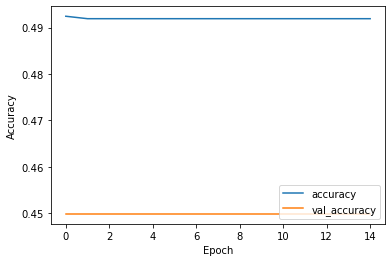

In [93]:
model, acc = sf.evaluate_model(X_train, X_test, y_train, y_test)